<a href="https://colab.research.google.com/github/Fredericobianchessi/Trabalhoindividual/blob/main/Projejtoindividual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Dados de Passagens Aéreas
##Introdução
Este trabalho tem como objetivo analisar duas bases de dados que contém a venda de passagens aéreas de uma operadora de turismo. O objetivo final é fornecer insights valiosos para a empresa, a fim de melhorar a estratégia de vendas e maximizar seus lucros.  

A primeira base de dados analisada, ao longo do código entitulada de Df, contém informações sobre vendas mensais por destino por loja, ou seja, quanto que uma loja vendeu em passagens aéreas para um determinado destino ao longo do mês. A base de dados possui informações a partir de janeiro de 2018 até dezembro de 2019.

A segunda base de dados analisada, ao longo do código entitulada de Df_embarque, contém informações sobre vendas mensais por data de embarque, ou seja, quanto que foi vendido em passagens aéreas para uma determinada data ao longo do mês. A base de dados possui informações a partir de janeiro de 2018 até dezembro de 2019.
 
  
 Serão utilizadas técnicas de análise de dados para comparar e entender as tendências e padrões encontrados nas duas bases de dados. 

##Dicionário de dados
###Base de dados por destino (Df)
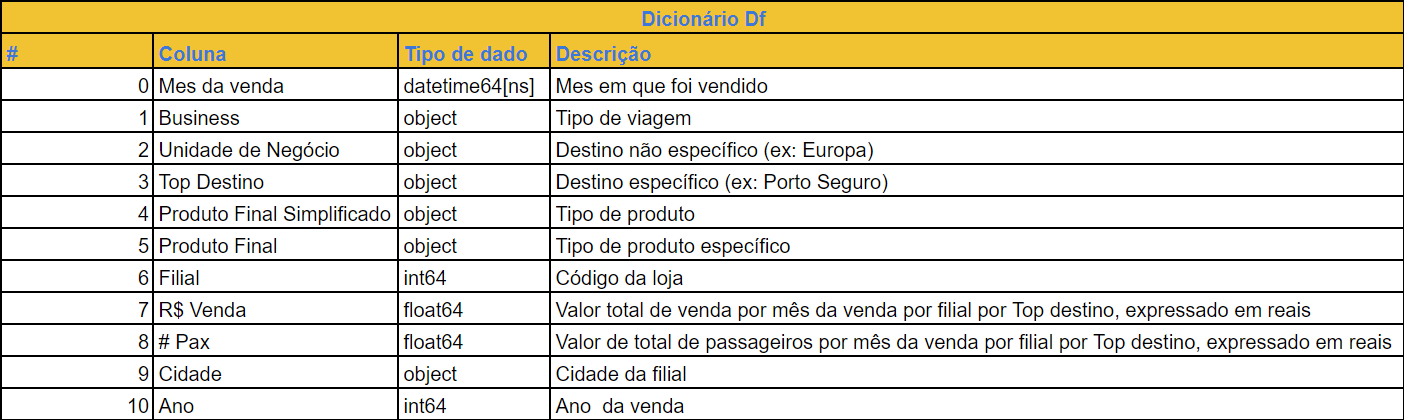

###Base de dados por data de embarque (Df_embarque)  
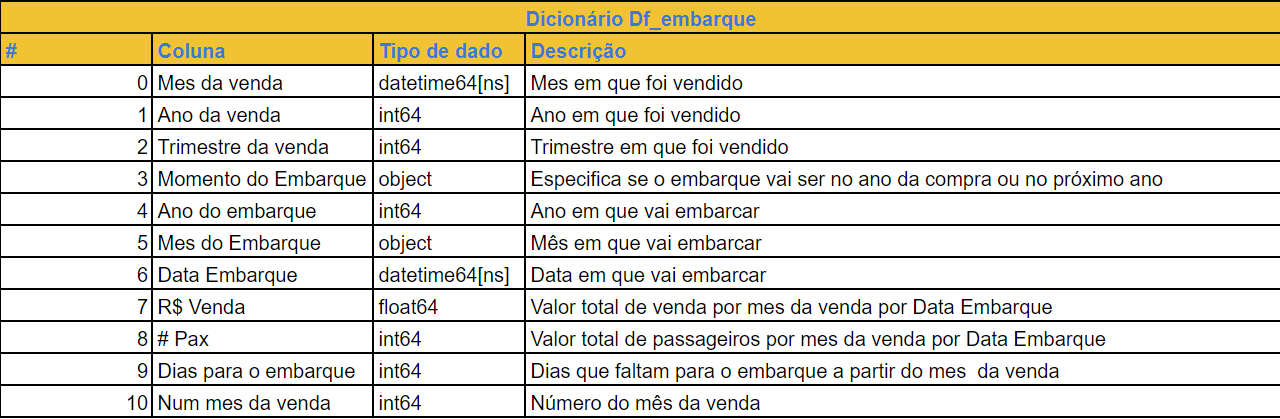



##Análise dos dados
###Importação das bilbliotecas e funções
Pandas, Matplotlib, numpy e google.colab

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Importação das bases de dados
Bases de dados importadas a partir do Google Drive.  
df: Base_venda_produto.xls  
df_embarque: Base_venda_embarque.xls  
lojas: Base dados Lojas.xls


In [2]:
df = pd.read_excel('/content/drive/MyDrive/Trabalho individual data science/Base_venda_produto.xlsx', sheet_name= "Planilha2")
df_embarque = pd.read_excel('/content/drive/MyDrive/Trabalho individual data science/Base_venda_embarque.xlsx', sheet_name= "Planilha2")
lojas = pd.read_excel('/content/drive/MyDrive/Trabalho individual data science/Base dados Lojas.xlsm')


###Pré-processamento da df  
Inclusão da informação de cidade da loja na df, a partir da base dados Lojas;  
Verificação do tipo de cada coluna;  
Analise de missings e correções.

In [3]:
df = pd.merge(df,lojas, on= 'Filial')
df['Ano'] = df['Mes da venda'].dt.year

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32594 entries, 0 to 32593
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Mes da venda                32594 non-null  datetime64[ns]
 1   Business                    32594 non-null  object        
 2   Unidade de Negócio          32353 non-null  object        
 3   Top Destino                 32353 non-null  object        
 4   Produto Final Simplificado  32594 non-null  object        
 5   Produto Final               32594 non-null  object        
 6   Filial                      32594 non-null  int64         
 7   R$ Venda                    24816 non-null  float64       
 8   # Pax                       24817 non-null  float64       
 9   Cidade                      32594 non-null  object        
 10  Ano                         32594 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)


In [5]:
df['# Pax'] = df['# Pax'].replace(np.nan, 0)
df['# Pax'] = df['# Pax'].astype(np.int64)

In [6]:
df['R$ Venda'] = df['R$ Venda'].replace(np.nan, 0)

###Resumo das informações pós pré-processamento

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32594 entries, 0 to 32593
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Mes da venda                32594 non-null  datetime64[ns]
 1   Business                    32594 non-null  object        
 2   Unidade de Negócio          32353 non-null  object        
 3   Top Destino                 32353 non-null  object        
 4   Produto Final Simplificado  32594 non-null  object        
 5   Produto Final               32594 non-null  object        
 6   Filial                      32594 non-null  int64         
 7   R$ Venda                    32594 non-null  float64       
 8   # Pax                       32594 non-null  int64         
 9   Cidade                      32594 non-null  object        
 10  Ano                         32594 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)


In [8]:
df.head()

,Mes da venda,Business,Unidade de Negócio,Top Destino,Produto Final Simplificado,Produto Final,Filial,R$ Venda,# Pax,Cidade,Ano
0,2018-04-01,Nacional,P. SEGURO + ARRAIAL,PORTO SEGURO,Fretamento,Fretamento,2810,136958.88,54,CAXIAS DO SUL,2018
1,2018-04-01,Internacional,EUROPA,FRANCA,Aéreo,Fácil - VBI,2810,40951.58,10,CAXIAS DO SUL,2018
2,2018-04-01,Internacional,AM. DO SUL,PERU,Fretamento,Fretamento,2810,25952.35,4,CAXIAS DO SUL,2018
3,2018-04-01,Internacional,FLORIDA,MIAMI,Aéreo,Fácil - VBI,2810,20192.75,8,CAXIAS DO SUL,2018
4,2018-04-01,Internacional,CARIBE,REPUBLICA DOMINICANA,Aéreo,Fácil - VBI,2810,18271.47,7,CAXIAS DO SUL,2018


In [9]:
df.describe()

,Filial,R$ Venda,# Pax,Ano
count,32594.000000,32594.000000,32594.000000,32594.000000
mean,5103.999785,5158.551525,3.028073,2018.618427
std,2304.069911,8762.567247,4.369537,0.485780
min,1110.000000,0.000000,0.000000,2018.000000
25%,2810.000000,350.280000,1.000000,2018.000000
50%,6612.000000,2326.065000,2.000000,2019.000000
75%,6652.000000,6226.100000,4.000000,2019.000000
max,6695.000000,177464.360000,87.000000,2019.000000


In [10]:
df_2018 = df['Ano']== 2018
df_2019 = df['Ano']== 2019 

In [11]:
df[df_2018].describe()

,Filial,R$ Venda,# Pax,Ano
count,12437.000000,12437.000000,12437.000000,12437.0
mean,5034.005226,6583.058524,4.024363,2018.0
std,2326.231064,9604.067308,4.752017,0.0
min,1110.000000,0.000000,1.000000,2018.0
25%,2810.000000,1580.360000,2.000000,2018.0
50%,6611.000000,3558.400000,2.000000,2018.0
75%,6660.000000,7807.100000,5.000000,2018.0
max,6695.000000,177464.360000,87.000000,2018.0


In [12]:
df[df_2019].describe()

,Filial,R$ Venda,# Pax,Ano
count,20157.000000,20157.000000,20157.000000,20157.0
mean,5147.186883,4279.621449,2.413355,2019.0
std,2289.279906,8076.253369,3.993855,0.0
min,1110.000000,0.000000,0.000000,2019.0
25%,4105.000000,0.000000,0.000000,2019.0
50%,6613.000000,1399.230000,1.000000,2019.0
75%,6652.000000,5141.290000,3.000000,2019.0
max,6695.000000,130226.920000,62.000000,2019.0


In [13]:
vendas_ano = df.pivot_table(values='R$ Venda', index='Ano', aggfunc='sum')
print(vendas_ano)

         R$ Venda
Ano              
2018  81873498.86
2019  86264329.55


In [14]:
pax_ano = df.pivot_table(values='# Pax', index='Ano', aggfunc='sum')
print(pax_ano)

      # Pax
Ano        
2018  50051
2019  48646


### Apresentação do volume de venda e número de passageiros pelas colunas

#### Apresentação do volume de venda e número de passageiros pela coluna "Business"

In [15]:
vendas_business_ano = df.pivot_table(values='R$ Venda', index='Business', columns='Ano', aggfunc='sum')
vendas_business_ano = vendas_business_ano.assign(Venda_Total=vendas_business_ano.sum(axis=1))
print(vendas_business_ano)

Ano                   2018         2019  Venda_Total
Business                                            
Consolidadora   1346995.94   1106969.32   2453965.26
Internacional  37206886.46  35910658.21  73117544.67
Nacional       43319616.46  49246702.02  92566318.48


In [16]:
pax_business_ano = df.pivot_table(values='# Pax', index='Business', columns='Ano', aggfunc='sum')
pax_business_ano = pax_business_ano.assign(Pax_Total=pax_business_ano.sum(axis=1))
print(pax_business_ano)

Ano             2018   2019  Pax_Total
Business                              
Consolidadora    560    539       1099
Internacional  11838  10591      22429
Nacional       37653  37516      75169


#### Apresentação do volume de venda e número de passageiros pela coluna "Produto Final Simplificado"

In [17]:
vendas_produto_ano = df.pivot_table(values='R$ Venda', index='Produto Final Simplificado', columns='Ano', aggfunc='sum')
vendas_produto_ano = vendas_produto_ano.assign(Venda_Total=vendas_produto_ano.sum(axis=1))
print(vendas_produto_ano)

Ano                                2018         2019   Venda_Total
Produto Final Simplificado                                        
Aéreo                       62073918.15  62670731.80  1.247446e+08
Fretamento                  19799580.71  23581411.75  4.338099e+07
RA - Aéreo                          NaN     12186.00  1.218600e+04


In [18]:
pax_produto_ano = df.pivot_table(values='# Pax', index='Produto Final Simplificado', columns='Ano', aggfunc='sum')
pax_produto_ano = pax_produto_ano.assign(Venda_Total=pax_produto_ano.sum(axis=1))
print(pax_produto_ano)

Ano                            2018     2019  Venda_Total
Produto Final Simplificado                               
Aéreo                       41545.0  38479.0      80024.0
Fretamento                   8506.0  10161.0      18667.0
RA - Aéreo                      NaN      6.0          6.0


#### Apresentação do volume de venda e número de passageiros pela coluna "Unidade de Negócio"

In [19]:
vendas_unidade_ano = df.pivot_table(values='R$ Venda', index='Unidade de Negócio', columns='Ano', aggfunc='sum')
vendas_unidade_ano = vendas_unidade_ano.assign(Venda_Total=vendas_unidade_ano.sum(axis=1))
print(vendas_unidade_ano)

Ano                         2018         2019  Venda_Total
Unidade de Negócio                                        
AL - SE               7929348.57  10639445.33  18568793.90
AM. DO SUL            4010890.09   3901960.61   7912850.70
BAHIA                 2897640.97   2787002.25   5684643.22
CARIBE                7449251.95   7118229.29  14567481.24
CE - MA - PI          3159394.60   2525020.66   5684415.26
CENTRO OESTE          1573390.06   1607829.95   3181220.01
CIRCUITOS EUROPA       456005.17    521514.36    977519.53
EUA - CANADA          3478185.66   2797195.61   6275381.27
EUROPA               13545530.59  13852132.99  27397663.58
EXOTICOS              3052374.85   2987688.48   6040063.33
FLORIDA               4073954.48   3685656.41   7759610.89
NORTE                  607660.79    661143.16   1268803.95
OUTROS INTER          1140693.67   1035315.46   2176009.13
P. SEGURO + ARRAIAL  11703542.28  14208813.83  25912356.11
PERNAMBUCO            3627594.91   4057371.35   7684966.

In [20]:
pax_unidade_ano = df.pivot_table(values='# Pax', index='Unidade de Negócio', columns='Ano', aggfunc='sum')
pax_unidade_ano = pax_unidade_ano.assign(Venda_Total=pax_unidade_ano.sum(axis=1))
print(pax_unidade_ano)

Ano                    2018    2019  Venda_Total
Unidade de Negócio                              
AL - SE              4800.0  5488.0      10288.0
AM. DO SUL           2099.0  2032.0       4131.0
BAHIA                2775.0  2345.0       5120.0
CARIBE               2928.0  2241.0       5169.0
CE - MA - PI         2660.0  1887.0       4547.0
CENTRO OESTE         1668.0  1480.0       3148.0
CIRCUITOS EUROPA       79.0    49.0        128.0
EUA - CANADA         1042.0   767.0       1809.0
EUROPA               3315.0  3573.0       6888.0
EXOTICOS              585.0   586.0       1171.0
FLORIDA              1383.0  1024.0       2407.0
NORTE                 514.0   540.0       1054.0
OUTROS INTER          407.0   315.0        722.0
P. SEGURO + ARRAIAL  6213.0  7462.0      13675.0
PERNAMBUCO           2962.0  2951.0       5913.0
RA                      NaN     6.0          6.0
RJ - ES              5198.0  4813.0      10011.0
RN - PB              1812.0  2190.0       4002.0
SP - MG             

#### Apresentação do volume de venda e número de passageiros pela coluna "Top Destino"

In [21]:
venda_destino_ano = df.pivot_table(values='R$ Venda', index='Top Destino', columns='Ano', aggfunc='sum')
venda_destino_ano = venda_destino_ano.assign(Venda_Total=venda_destino_ano.sum(axis=1))
venda_destino_ano= venda_destino_ano.sort_values(by='Venda_Total', ascending=False)
print(venda_destino_ano.head(10))

Ano                          2018         2019  Venda_Total
Top Destino                                                
PORTO SEGURO          11362606.77  13802347.25  25164954.02
MACEIO                 7316450.43   9602938.34  16919388.77
PORTUGAL               3608098.88   3778140.11   7386238.99
RIO DE JANEIRO         3152900.92   3631491.92   6784392.84
RECIFE                 3099932.90   3675602.60   6775535.50
REPUBLICA DOMINICANA   3520914.72   2888134.84   6409049.56
ITALIA                 3195204.52   2810154.02   6005358.54
SALVADOR               2519351.65   2416563.72   4935915.37
FORTALEZA              2666246.95   1997777.39   4664024.34
CANCUN                 1962483.41   2364100.75   4326584.16


In [22]:
pax_destino_ano = df.pivot_table(values='# Pax', index='Top Destino', columns='Ano', aggfunc='sum')
pax_destino_ano = pax_destino_ano.assign(Pax_Total=pax_destino_ano.sum(axis=1))
pax_destino_ano= pax_destino_ano.sort_values(by='Pax_Total', ascending=False)
print(pax_destino_ano.head(10))

Ano               2018    2019  Pax_Total
Top Destino                              
PORTO SEGURO    6088.0  7296.0    13384.0
MACEIO          4408.0  5057.0     9465.0
RIO DE JANEIRO  4716.0  4316.0     9032.0
RECIFE          2668.0  2769.0     5437.0
GUARULHOS       2627.0  2473.0     5100.0
SALVADOR        2474.0  2077.0     4551.0
PORTO ALEGRE    2182.0  1902.0     4084.0
FORTALEZA       2228.0  1466.0     3694.0
SAO PAULO       1490.0  1543.0     3033.0
NATAL           1306.0  1559.0     2865.0


#### Apresentação do volume de venda e número de passageiros pela coluna "Cidade"

In [23]:
venda_cidade_ano = df.pivot_table(values='R$ Venda', index='Cidade', columns='Ano', aggfunc='sum')
venda_cidade_ano = venda_cidade_ano.assign(Venda_Total=venda_cidade_ano.sum(axis=1))
venda_cidade_ano= venda_cidade_ano.sort_values(by='Venda_Total', ascending=False)
print(venda_cidade_ano)

Ano                          2018         2019  Venda_Total
Cidade                                                     
PORTO ALEGRE          21775765.87  23497607.31  45273373.18
CAXIAS DO SUL          8254945.25   7678794.32  15933739.57
PASSO FUNDO            7748916.39   7545049.88  15293966.27
PELOTAS                7660540.70   6979042.74  14639583.44
SANTA MARIA            4755464.63   6411646.05  11167110.68
SANTA CRUZ DO SUL      3806250.60   3163204.72   6969455.32
CAPÃO DA CANOA         3098218.64   3164432.26   6262650.90
RIO GRANDE             2790169.73   2501062.44   5291232.17
ERECHIM                2454605.26   2354818.82   4809424.08
SANTANA LIVRAMENTO     1316644.34   1854810.27   3171454.61
VIAMÃO                 1320272.73   1620501.19   2940773.92
VENÂNCIO AIRES         1347901.90   1418286.38   2766188.28
IJUI                   1273776.69   1490773.19   2764549.88
SANTA ROSA             1338370.03   1283914.07   2622284.10
CARAZINHO              1307784.67   1239

In [24]:
pax_cidade_ano = df.pivot_table(values='# Pax', index='Cidade', columns='Ano', aggfunc='sum')
pax_cidade_ano = pax_cidade_ano.assign(Pax_Total=pax_cidade_ano.sum(axis=1))
pax_cidade_ano= pax_cidade_ano.sort_values(by='Pax_Total', ascending=False)
print(pax_cidade_ano)

Ano                      2018     2019  Pax_Total
Cidade                                           
PORTO ALEGRE          11782.0  11618.0    23400.0
PELOTAS                4973.0   4118.0     9091.0
PASSO FUNDO            4517.0   4347.0     8864.0
CAXIAS DO SUL          4439.0   3927.0     8366.0
SANTA MARIA            2708.0   3241.0     5949.0
SANTA CRUZ DO SUL      2802.0   2183.0     4985.0
CAPÃO DA CANOA         2064.0   1876.0     3940.0
ERECHIM                2140.0   1767.0     3907.0
RIO GRANDE             2031.0   1660.0     3691.0
VIAMÃO                 1036.0   1188.0     2224.0
VENÂNCIO AIRES          996.0    954.0     1950.0
SANTANA LIVRAMENTO      826.0    979.0     1805.0
IJUI                    854.0    815.0     1669.0
CARAZINHO               762.0    785.0     1547.0
CAMAQUÃ                 644.0    836.0     1480.0
SANTA ROSA              699.0    715.0     1414.0
BAGE                    756.0    645.0     1401.0
GRAMADO                 759.0    603.0     1362.0


### Apresentação de gráficos

In [25]:
df.sort_values(by='Mes da venda', inplace=True)

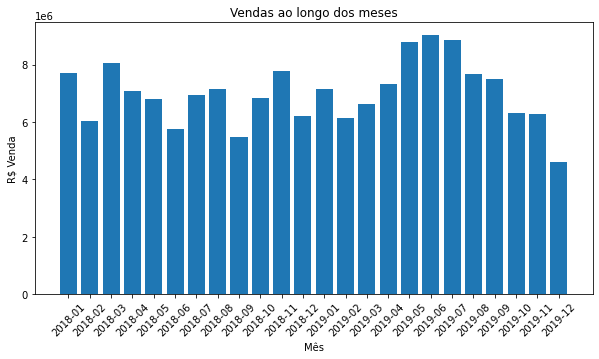

In [26]:

df = df.set_index('Mes da venda')

grouped_data = df.groupby(['Mes da venda'])['R$ Venda'].sum()

plt.figure(figsize=(10, 5))
plt.title('Vendas ao longo dos meses')
plt.xlabel('Mês')
plt.ylabel('R$ Venda')
plt.bar(range(len(grouped_data)), grouped_data)
plt.xticks(range(len(grouped_data)), grouped_data.index.strftime('%Y-%m'), rotation=45)
plt.show()

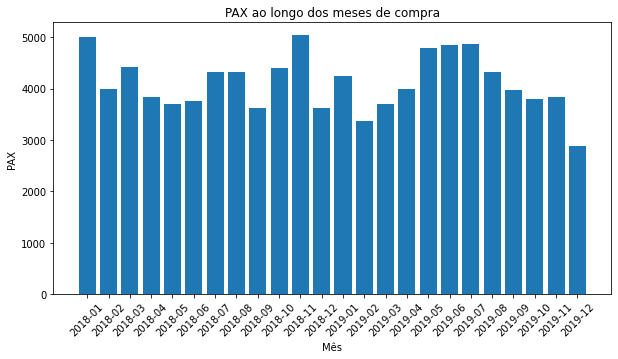

In [27]:
grouped_data_PAX = df.groupby(['Mes da venda'])['# Pax'].sum()

plt.figure(figsize=(10, 5))
plt.title('PAX ao longo dos meses de compra')
plt.xlabel('Mês')
plt.ylabel('PAX')
plt.bar(range(len(grouped_data_PAX)), grouped_data_PAX)
plt.xticks(range(len(grouped_data_PAX)), grouped_data_PAX.index.strftime('%Y-%m'), rotation=45)
plt.show()

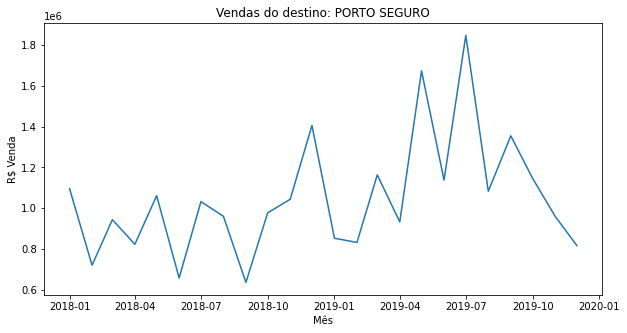

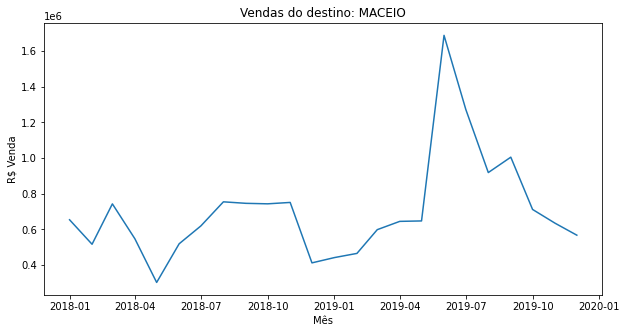

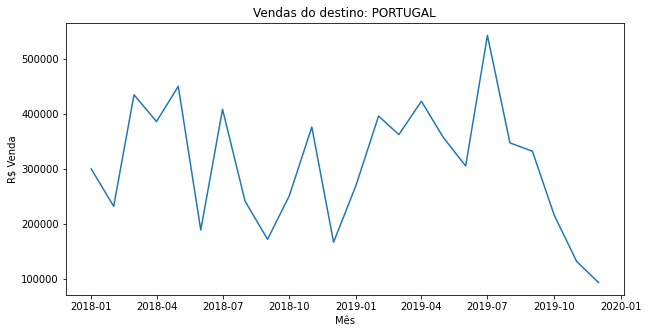

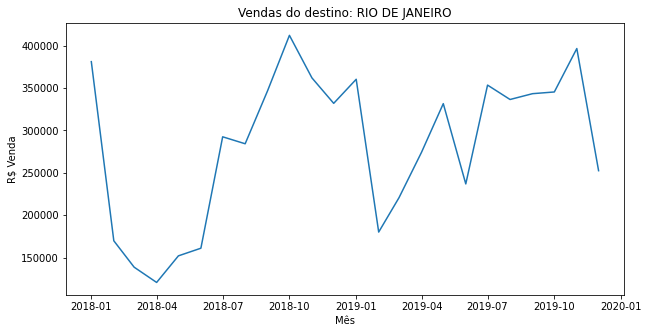

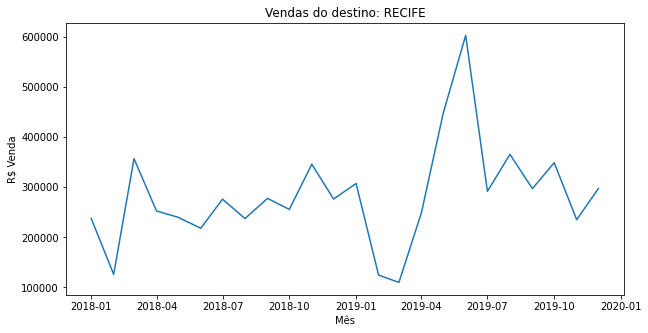

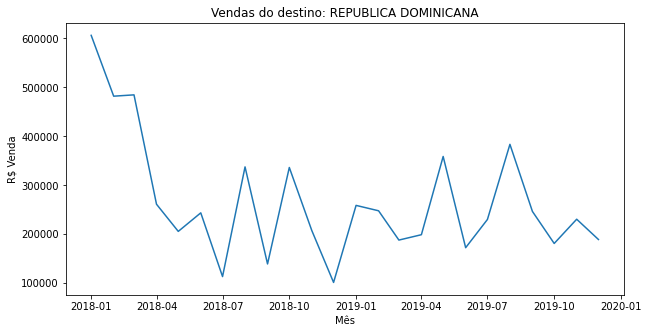

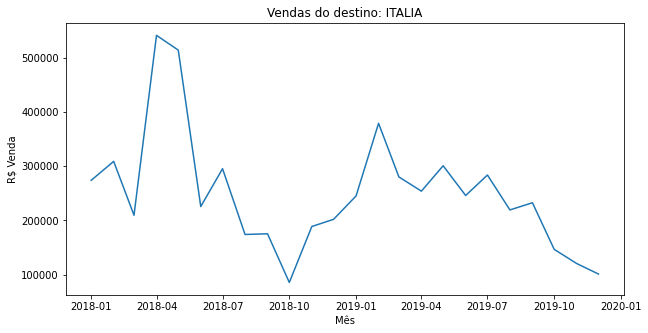

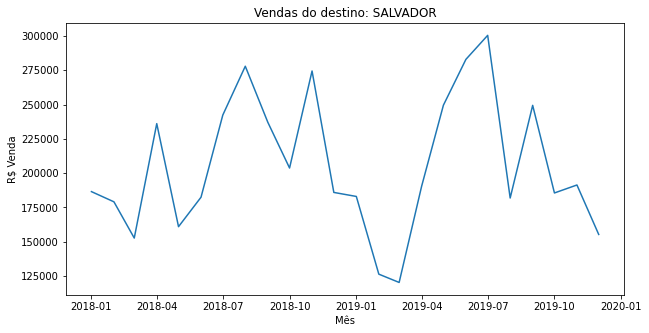

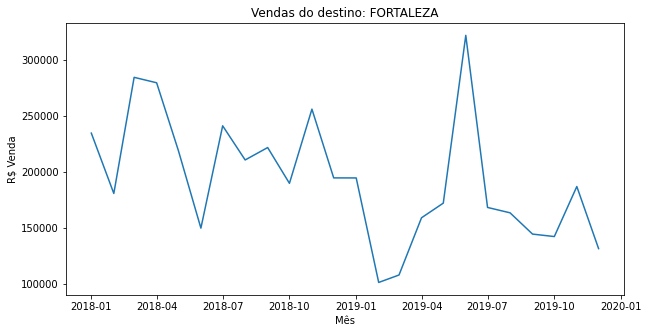

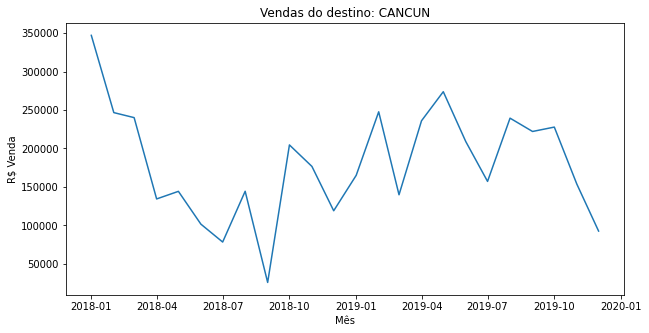

In [28]:

    grouped_data = df.groupby(['Mes da venda', 'Top Destino'])['R$ Venda'].sum()

    top_destinations = grouped_data.groupby(level=1).sum().nlargest(10).index

    for destination in top_destinations: 
        destination_data = grouped_data.loc[:, destination]
        
        plt.figure(figsize=(10, 5))
        plt.title(f'Vendas do destino: {destination}')
        plt.xlabel('Mês')
        plt.ylabel('R$ Venda')
        plt.plot(destination_data)
        plt.show()

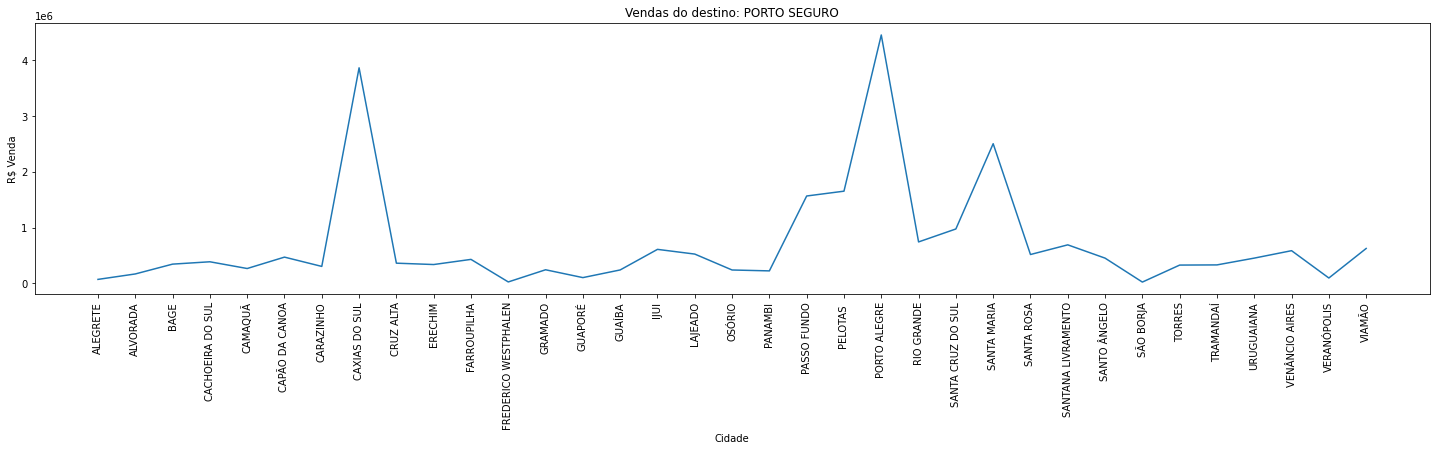

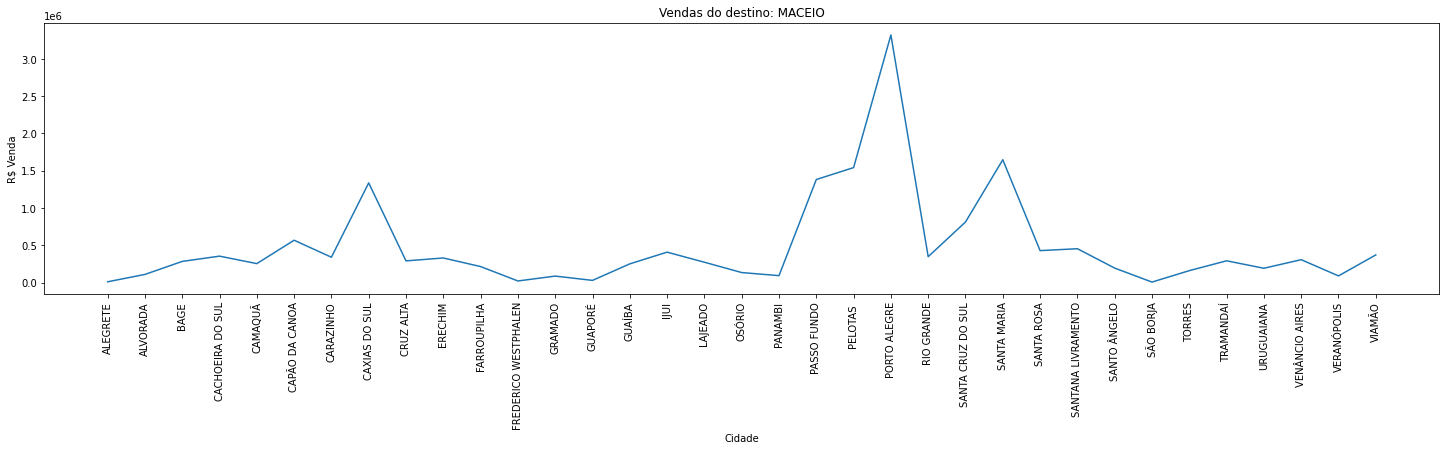

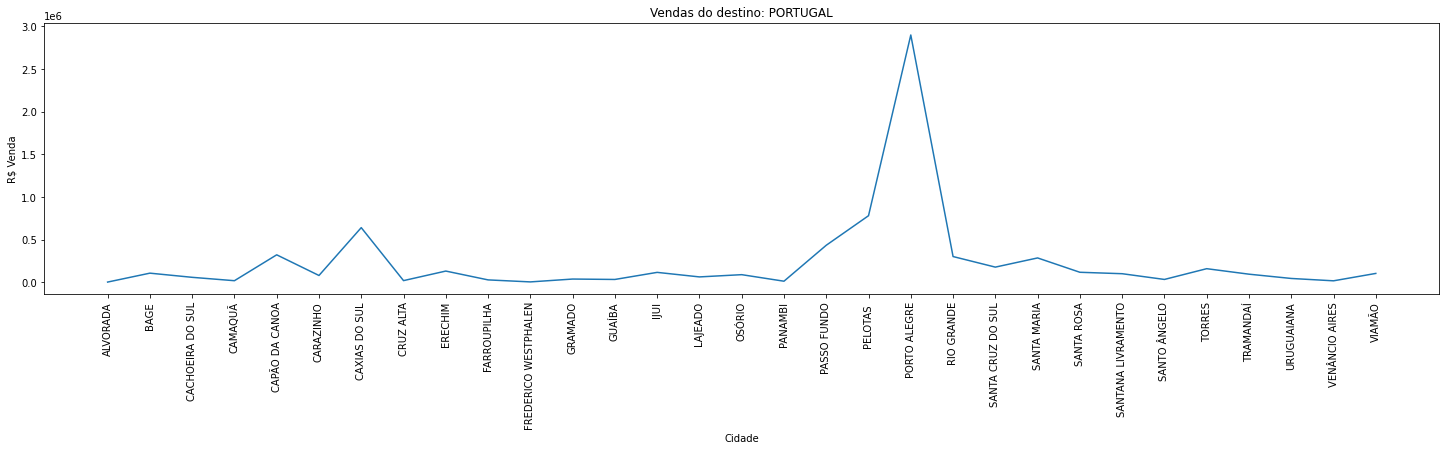

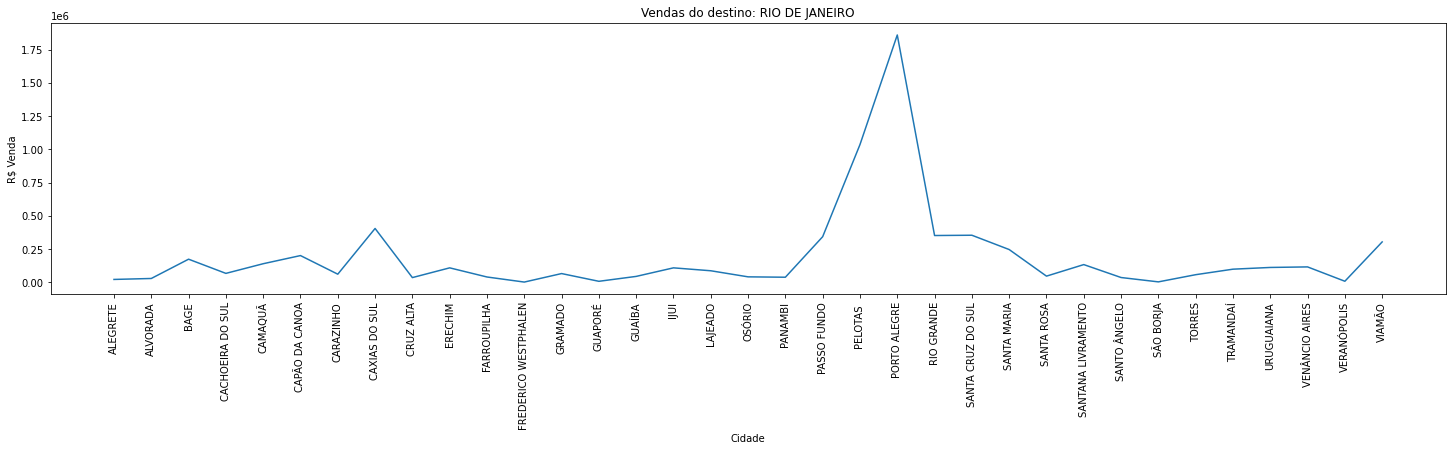

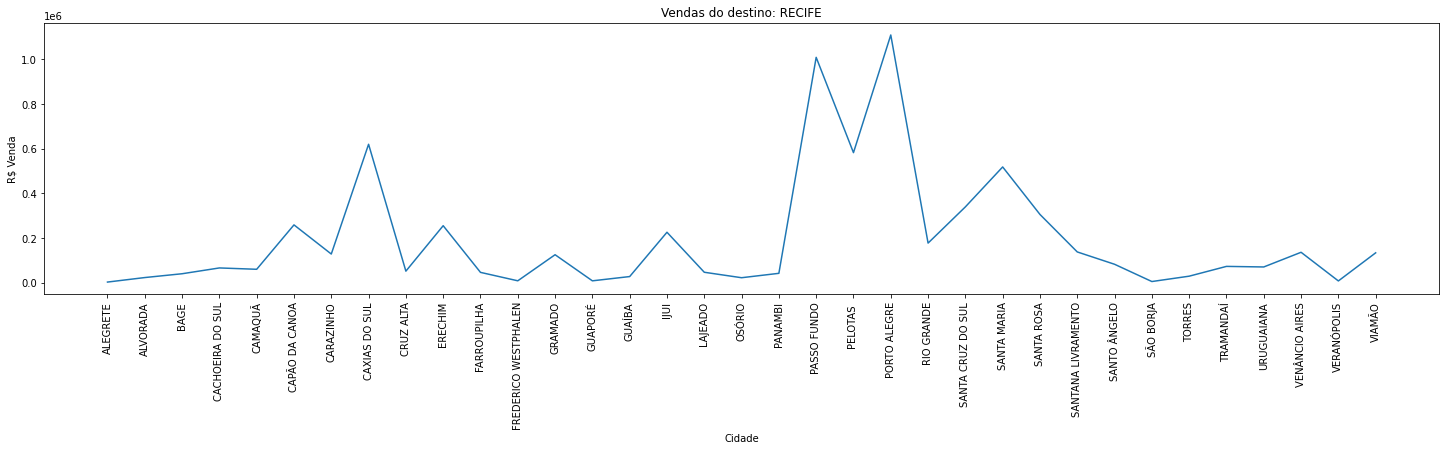

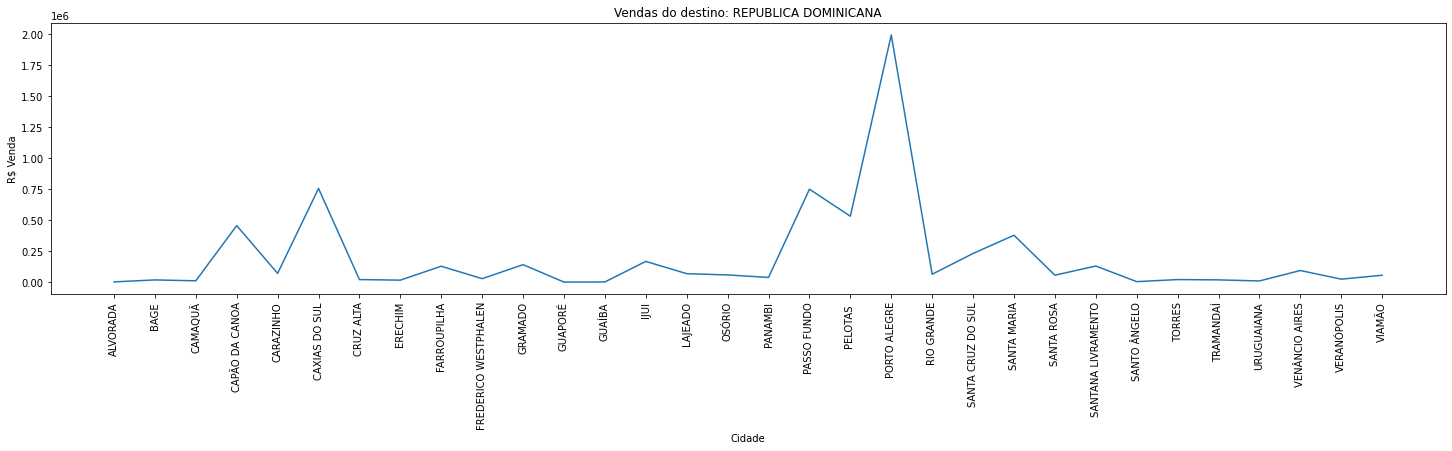

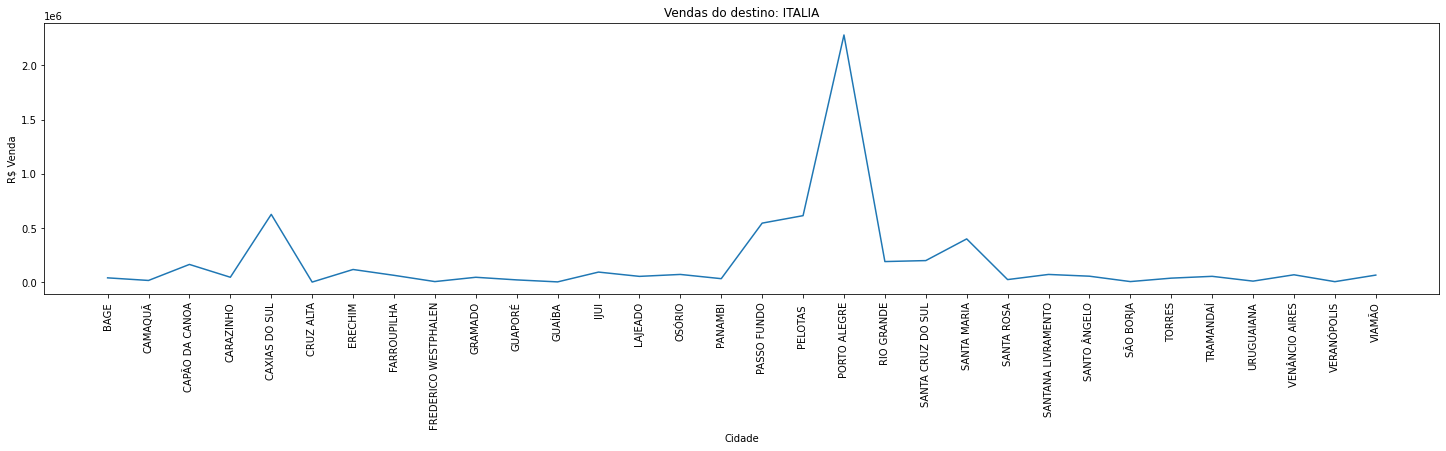

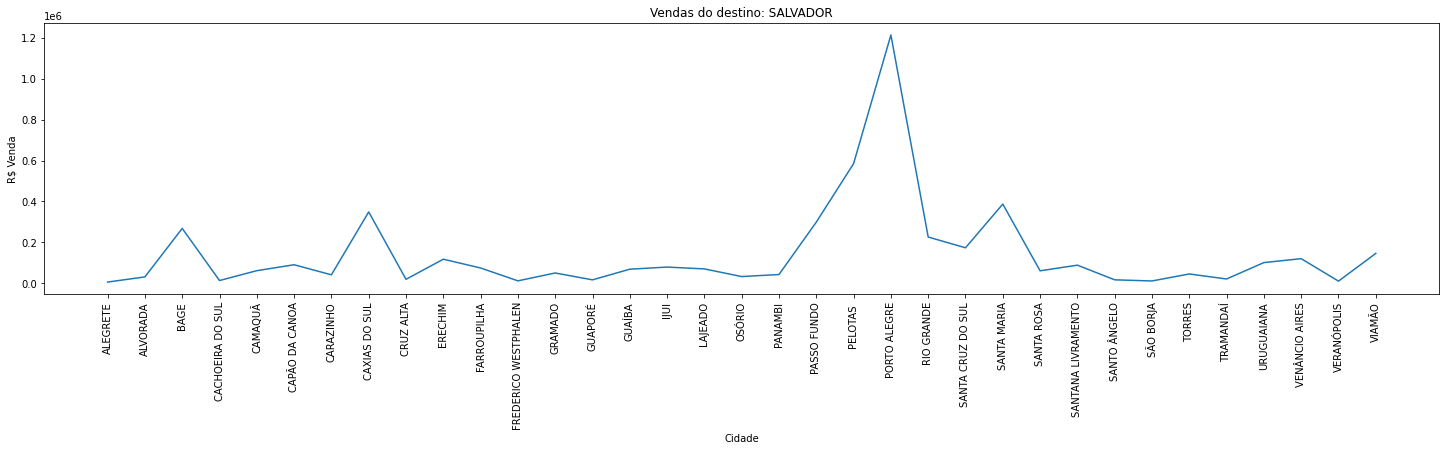

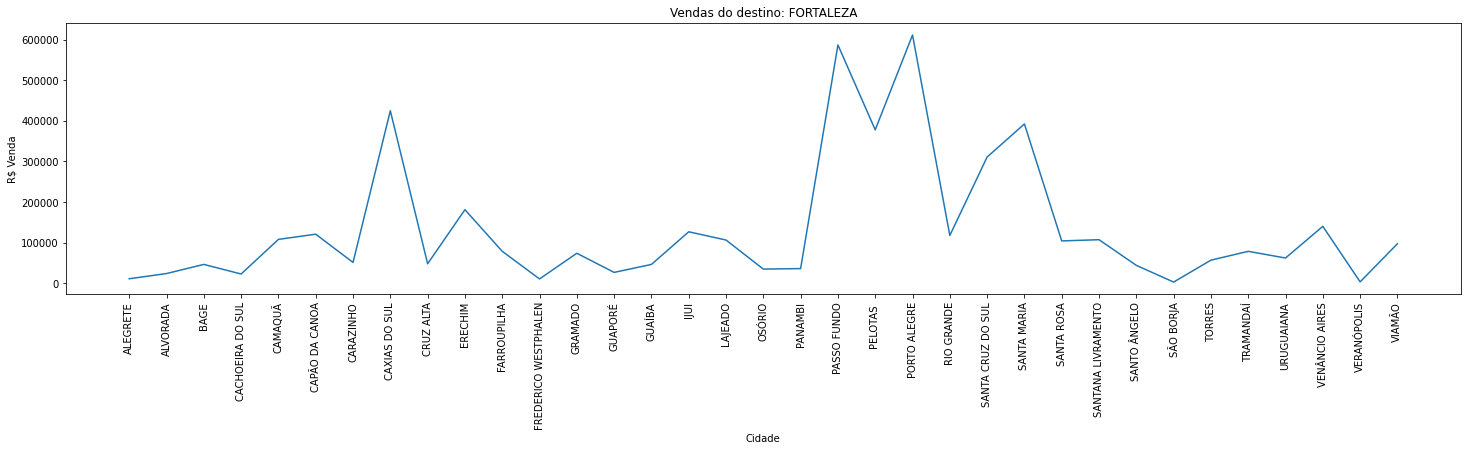

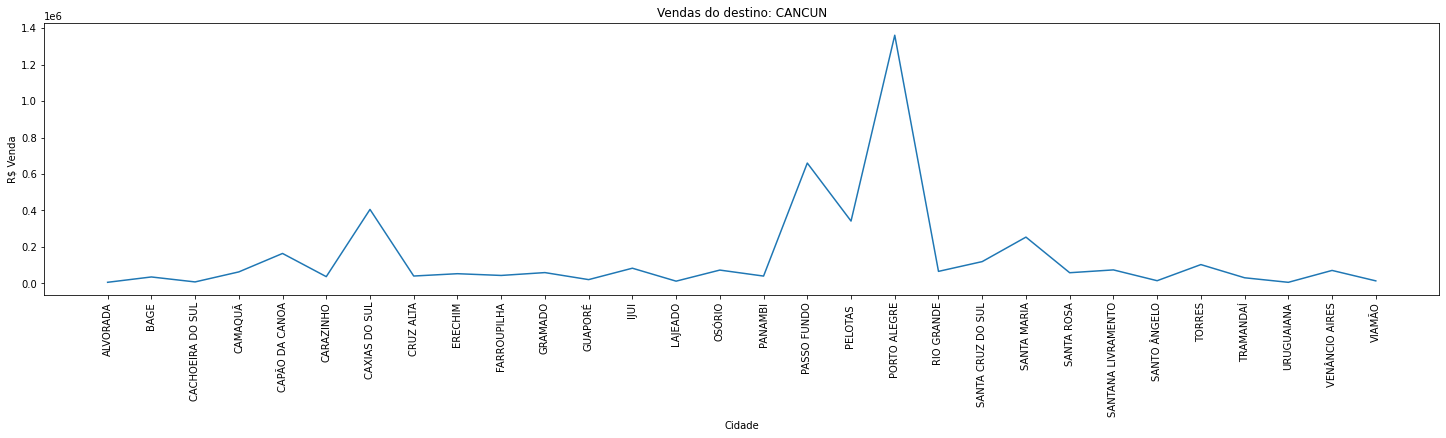

In [29]:
    grouped_cidade_destino = df.groupby(['Cidade', 'Top Destino'])['R$ Venda'].sum();


    top_destinations = grouped_cidade_destino.groupby(level=1).sum().nlargest(10).index
    
    for destination in top_destinations:       
        destination_data = grouped_cidade_destino.loc[:, destination]
        
        plt.figure(figsize=(25, 5))
        plt.title(f'Vendas do destino: {destination}')
        plt.xlabel('Cidade')
        plt.ylabel('R$ Venda')
        plt.xticks(rotation = 90)
        plt.plot(destination_data)
        plt.show()

###Pré-processamento da df_embarque

In [30]:
df_embarque.head()

,Mes da venda,Ano da venda,Trimestre da venda,Momento do Embarque,Ano do embarque,Mes do Embarque,Data Embarque,R$ Venda,# Pax,Dias para o embarque
0,2018-04-01,2018,2,Ano Atual,2018,jul,2018-07-14,236796.94,86,104
1,2018-04-01,2018,2,Ano Atual,2018,jul,2018-07-21,199248.12,86,111
2,2018-04-01,2018,2,Ano Atual,2018,jun,2018-06-02,147873.16,60,62
3,2018-04-01,2018,2,Ano Atual,2018,jul,2018-07-10,102927.30,14,100
4,2018-04-01,2018,2,Ano Atual,2018,jul,2018-07-18,101528.79,38,108


In [31]:
df_embarque['Num mes da venda'] = df_embarque['Mes da venda'].dt.month

In [32]:
df_embarque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5774 entries, 0 to 5773
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Mes da venda          5774 non-null   datetime64[ns]
 1   Ano da venda          5774 non-null   int64         
 2   Trimestre da venda    5774 non-null   int64         
 3   Momento do Embarque   5774 non-null   object        
 4   Ano do embarque       5774 non-null   int64         
 5   Mes do Embarque       5774 non-null   object        
 6   Data Embarque         5774 non-null   datetime64[ns]
 7   R$ Venda              5774 non-null   float64       
 8   # Pax                 5774 non-null   int64         
 9   Dias para o embarque  5774 non-null   int64         
 10  Num mes da venda      5774 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(2)
memory usage: 496.3+ KB


### Resumo das informações pós pré-processamento

In [33]:
df_embarque.head()

,Mes da venda,Ano da venda,Trimestre da venda,Momento do Embarque,Ano do embarque,Mes do Embarque,Data Embarque,R$ Venda,# Pax,Dias para o embarque,Num mes da venda
0,2018-04-01,2018,2,Ano Atual,2018,jul,2018-07-14,236796.94,86,104,4
1,2018-04-01,2018,2,Ano Atual,2018,jul,2018-07-21,199248.12,86,111,4
2,2018-04-01,2018,2,Ano Atual,2018,jun,2018-06-02,147873.16,60,62,4
3,2018-04-01,2018,2,Ano Atual,2018,jul,2018-07-10,102927.30,14,100,4
4,2018-04-01,2018,2,Ano Atual,2018,jul,2018-07-18,101528.79,38,108,4


In [34]:
df_embarque.describe()

,Ano da venda,Trimestre da venda,Ano do embarque,R$ Venda,# Pax,Dias para o embarque,Num mes da venda
count,5774.000000,5774.000000,5774.000000,5774.000000,5774.000000,5774.000000,5774.000000
mean,2018.466055,2.364912,2018.749221,29119.817875,17.093349,132.406997,6.065639
std,0.498890,1.092954,0.637050,33440.467366,17.769082,86.818140,3.343598
min,2018.000000,1.000000,2018.000000,0.000000,1.000000,-66.000000,1.000000
25%,2018.000000,1.000000,2018.000000,8173.165000,5.000000,60.000000,3.000000
50%,2018.000000,2.000000,2019.000000,19411.500000,12.000000,122.000000,6.000000
75%,2019.000000,3.000000,2019.000000,38114.145000,24.000000,194.000000,9.000000
max,2019.000000,4.000000,2020.000000,393615.810000,193.000000,457.000000,12.000000


[]

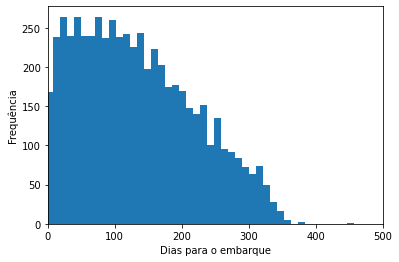

In [35]:
df_embarque['Dias para o embarque'].plot(kind= 'hist', bins= 50)
plt.xlabel("Dias para o embarque")
plt.ylabel("Frequência")
plt.xlim(0, 500)
plt.plot()

[]

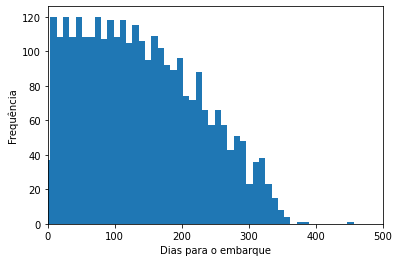

In [36]:
df_embarque_2018 = df_embarque['Ano da venda']== 2018
df_embarque[df_embarque_2018]['Dias para o embarque'].plot(kind= 'hist', bins= 50)
plt.xlabel("Dias para o embarque")
plt.ylabel("Frequência")
plt.xlim(0, 500)
plt.plot()

[]

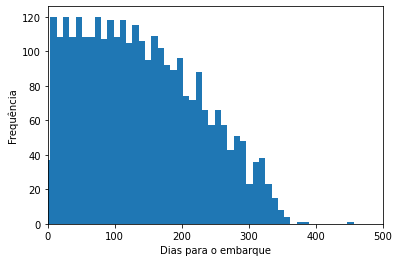

In [37]:
df_embarque_2019 = df_embarque['Ano da venda']== 2019
df_embarque[df_embarque_2018]['Dias para o embarque'].plot(kind= 'hist', bins= 50)
plt.xlabel("Dias para o embarque")
plt.ylabel("Frequência")
plt.xlim(0, 500)
plt.plot()

### Segmentação dos dados a partir da coluna "Dias para o embarque"  
Divisão dos dados em 4 faixas:   
- Compras feitas faltando no máximo 30 dias para o embarque;
- Compras feitas faltando no mínimo 31 e no máximo 60 dias para o embarque;
- Compras feitas faltando no mínimo 61 e no máximo 90 dias para o embarque;
- Compras feitas faltando no mínimo 90 dias para o embarque;

In [38]:
compra_1m_filter= df_embarque['Dias para o embarque']<=30
compra_1m= df_embarque[compra_1m_filter]

compra_2m_filter = (df_embarque['Dias para o embarque'] > 30) & (df_embarque['Dias para o embarque'] <= 60)
compra_2m = df_embarque[compra_2m_filter]

compra_3m_filter= (df_embarque['Dias para o embarque'] > 60) & (df_embarque['Dias para o embarque'] <= 90)
compra_3m = df_embarque[compra_3m_filter]

compra_3mais_filter= df_embarque['Dias para o embarque'] > 90
compra_3mais = df_embarque[compra_3mais_filter]
                        

### Describe das dataframes segmentadas

In [39]:
compra_1m.describe()

,Ano da venda,Trimestre da venda,Ano do embarque,R$ Venda,# Pax,Dias para o embarque,Num mes da venda
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.00000,730.000000
mean,2018.502740,2.489041,2018.502740,32183.270685,22.228767,14.89863,6.472603
std,0.500335,1.119972,0.500335,31047.452810,18.364575,10.00456,3.448216
min,2018.000000,1.000000,2018.000000,167.290000,1.000000,-66.00000,1.000000
25%,2018.000000,1.000000,2018.000000,12728.192500,10.000000,8.00000,3.000000
50%,2019.000000,2.000000,2019.000000,24822.940000,18.000000,15.00000,6.000000
75%,2019.000000,3.000000,2019.000000,41335.117500,29.000000,23.00000,9.000000
max,2019.000000,4.000000,2019.000000,277290.620000,127.000000,30.00000,12.000000


In [40]:
compra_2m.describe()

,Ano da venda,Trimestre da venda,Ano do embarque,R$ Venda,# Pax,Dias para o embarque,Num mes da venda
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2018.500000,2.500000,2018.583333,52309.781194,34.218056,45.500000,6.500000
std,0.500348,1.118811,0.571702,46643.589669,23.579734,8.661458,3.454452
min,2018.000000,1.000000,2018.000000,1935.210000,3.000000,31.000000,1.000000
25%,2018.000000,1.750000,2018.000000,25646.242500,20.000000,38.000000,3.750000
50%,2018.500000,2.500000,2019.000000,39347.420000,28.000000,45.500000,6.500000
75%,2019.000000,3.250000,2019.000000,61139.967500,41.000000,53.000000,9.250000
max,2019.000000,4.000000,2020.000000,393615.810000,193.000000,60.000000,12.000000


In [41]:
compra_3m.describe()

,Ano da venda,Trimestre da venda,Ano do embarque,R$ Venda,# Pax,Dias para o embarque,Num mes da venda
count,716.00000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,2018.50000,2.501397,2018.666201,42668.812626,24.805866,75.445531,6.502793
std,0.50035,1.118815,0.622674,39693.159949,19.061036,8.650387,3.452575
min,2018.00000,1.000000,2018.000000,956.930000,1.000000,61.000000,1.000000
25%,2018.00000,1.750000,2018.000000,18636.252500,13.000000,68.000000,3.750000
50%,2018.50000,3.000000,2019.000000,31646.370000,21.000000,75.000000,7.000000
75%,2019.00000,3.250000,2019.000000,50824.012500,32.000000,83.000000,9.250000
max,2019.00000,4.000000,2020.000000,327095.930000,186.000000,90.000000,12.000000


In [42]:
compra_3mais.describe()

,Ano da venda,Trimestre da venda,Ano do embarque,R$ Venda,# Pax,Dias para o embarque,Num mes da venda
count,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000
mean,2018.445122,2.285754,2018.848670,21183.516771,11.106430,184.828991,5.809867
std,0.497048,1.069577,0.654128,25303.808640,11.949635,65.715122,3.251733
min,2018.000000,1.000000,2018.000000,0.000000,1.000000,91.000000,1.000000
25%,2018.000000,1.000000,2018.000000,5584.857500,3.000000,130.000000,3.000000
50%,2018.000000,2.000000,2019.000000,12989.150000,7.000000,173.000000,6.000000
75%,2019.000000,3.000000,2019.000000,27898.302500,14.000000,231.000000,8.000000
max,2019.000000,4.000000,2020.000000,252495.060000,126.000000,457.000000,12.000000


###Análise da sazonalidade das segmentações  

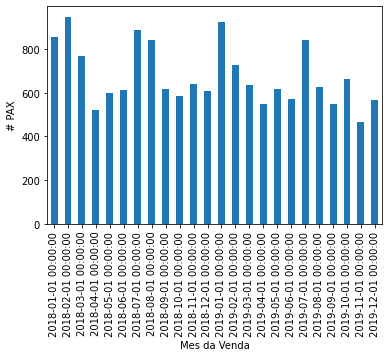

In [43]:
compra_1m.groupby(['Mes da venda'])['# Pax'].sum().plot(kind='bar', xlabel='Mes da Venda', ylabel='# PAX')
plt.show()


In [44]:
compra_1m_grouped_pax = compra_1m.groupby('Mes da venda')['# Pax'].sum()
compra_1m_grouped_pax.sort_values(ascending=False, inplace=True)
print(compra_1m_grouped_pax.head(10))

Mes da venda
2018-02-01    949
2019-01-01    922
2018-07-01    889
2018-01-01    856
2018-08-01    843
2019-07-01    842
2018-03-01    768
2019-02-01    726
2019-10-01    661
2018-11-01    638
Name: # Pax, dtype: int64


In [45]:
compra_1m_grouped_venda = compra_1m.groupby('Mes da venda')['R$ Venda'].sum()
compra_1m_grouped_venda.sort_values(ascending=False, inplace=True)
print(compra_1m_grouped_venda.head(10))

Mes da venda
2019-07-01    1643190.89
2019-01-01    1443216.66
2018-07-01    1247730.82
2018-08-01    1217100.89
2018-01-01    1162621.77
2019-08-01    1141825.49
2019-02-01    1107520.01
2018-02-01    1060726.60
2018-12-01    1013667.91
2019-12-01     981538.18
Name: R$ Venda, dtype: float64


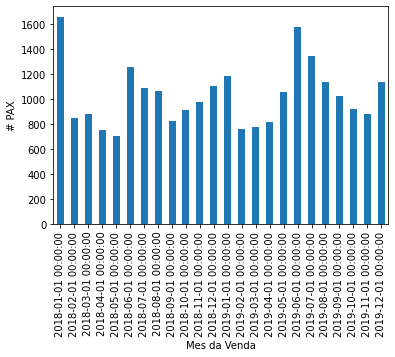

In [46]:
compra_2m.groupby(['Mes da venda'])['# Pax'].sum().plot(kind='bar', xlabel='Mes da Venda', ylabel='# PAX')
plt.show()

In [47]:
compra_2m_grouped_pax = compra_2m.groupby('Mes da venda')['# Pax'].sum()
compra_2m_grouped_pax.sort_values(ascending=False, inplace=True)
print(compra_2m_grouped_pax.head(10))

Mes da venda
2018-01-01    1657
2019-06-01    1574
2019-07-01    1345
2018-06-01    1255
2019-01-01    1183
2019-12-01    1133
2019-08-01    1130
2018-12-01    1101
2018-07-01    1084
2018-08-01    1064
Name: # Pax, dtype: int64


In [48]:
compra_2m_grouped_venda = compra_2m.groupby('Mes da venda')['R$ Venda'].sum()
compra_2m_grouped_venda.sort_values(ascending=False, inplace=True)
print(compra_2m_grouped_venda.head(10))

Mes da venda
2019-06-01    2924219.46
2018-01-01    2256175.34
2019-07-01    2167153.84
2018-12-01    1836366.17
2018-06-01    1826651.34
2019-08-01    1809209.32
2019-12-01    1780336.50
2019-11-01    1702128.78
2019-09-01    1696569.57
2019-01-01    1680648.21
Name: R$ Venda, dtype: float64


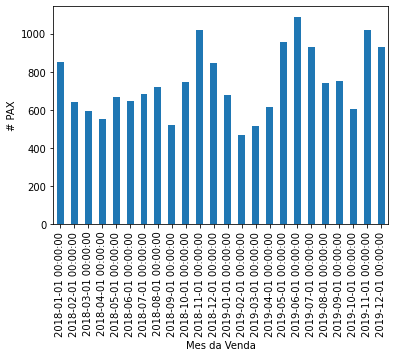

In [49]:
compra_3m.groupby(['Mes da venda'])['# Pax'].sum().plot(kind='bar', xlabel='Mes da Venda', ylabel='# PAX')
plt.show()

In [50]:
compra_3m_grouped_pax = compra_3m.groupby('Mes da venda')['# Pax'].sum()
compra_3m_grouped_pax.sort_values(ascending=False, inplace=True)
print(compra_3m_grouped_pax.head(10))

Mes da venda
2019-06-01    1089
2018-11-01    1019
2019-11-01    1018
2019-05-01     955
2019-12-01     931
2019-07-01     928
2018-01-01     850
2018-12-01     844
2019-09-01     749
2018-10-01     743
Name: # Pax, dtype: int64


In [51]:
compra_3m_grouped_venda = compra_3m.groupby('Mes da venda')['R$ Venda'].sum()
compra_3m_grouped_venda.sort_values(ascending=False, inplace=True)
print(compra_3m_grouped_venda.head(10))

Mes da venda
2019-05-01    2034369.72
2019-06-01    1949318.09
2018-11-01    1730664.07
2019-11-01    1655651.51
2019-07-01    1524016.51
2018-05-01    1428954.71
2019-12-01    1396427.56
2018-10-01    1383602.77
2018-08-01    1288790.78
2019-09-01    1244412.69
Name: R$ Venda, dtype: float64


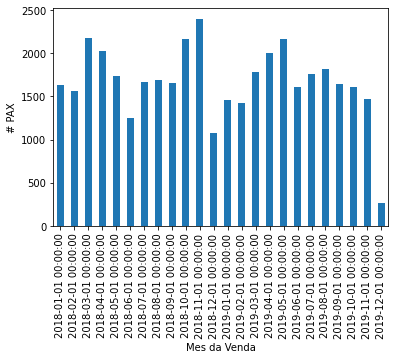

In [52]:
compra_3mais.groupby(['Mes da venda'])['# Pax'].sum().plot(kind='bar', xlabel='Mes da Venda', ylabel='# PAX')
plt.show()

In [53]:
compra_3mais_grouped_pax = compra_3mais.groupby('Mes da venda')['# Pax'].sum()
compra_3mais_grouped_pax.sort_values(ascending=False, inplace=True)
print(compra_3mais_grouped_pax.head(10))

Mes da venda
2018-11-01    2404
2018-03-01    2175
2019-05-01    2168
2018-10-01    2165
2018-04-01    2023
2019-04-01    2008
2019-08-01    1824
2019-03-01    1789
2019-07-01    1756
2018-05-01    1735
Name: # Pax, dtype: int64


In [54]:
compra_3mais_grouped_venda = compra_3mais.groupby('Mes da venda')['R$ Venda'].sum()
compra_3mais_grouped_venda.sort_values(ascending=False, inplace=True)
print(compra_3mais_grouped_venda.head(10))

Mes da venda
2018-03-01    4817972.56
2018-04-01    4374875.52
2019-05-01    4155010.51
2019-04-01    3995149.67
2019-03-01    3757076.91
2018-05-01    3658647.76
2018-11-01    3618993.51
2019-09-01    3614210.47
2019-07-01    3512979.73
2019-08-01    3498147.91
Name: R$ Venda, dtype: float64
